# Question 1
## a.

In [1]:
using DataFrames
df = readtable("uy_data.csv",header=false)

INFO: Precompiling module DataFrames.


,x1,x2
1,-0.9188,-1.0773
2,-0.6159,-0.9419
3,0.1959,-0.0915
4,-0.0316,0.0245
5,-1.3455,-1.3239
6,-0.0513,-0.3536
7,0.1471,0.1032
8,-1.1615,-1.0702
9,0.5478,0.2722
10,0.6096,0.9127


In [22]:
y_vals = []
for val in df[:,2]
    append!(y_vals,val)
end
u_vals = []
for val in df[:1]
    append!(u_vals,val)
end
k=5

A_AR = zeros(length(y_vals),k)

for i in 1:k
    A_AR[i+1:end,i] = y_vals[1:end - i ]
end
wopt_ar = A\y_vals

A_MA = zeros(length(y_vals),k)
for i in 1:k
    A_MA[i:end,i] = u_vals[1:end-i + 1]
end

wopt_ma = A_MA\y_vals



5-element Array{Any,1}:
 1.1012    
 0.528947  
 0.262297  
 0.0521686 
 0.00421062

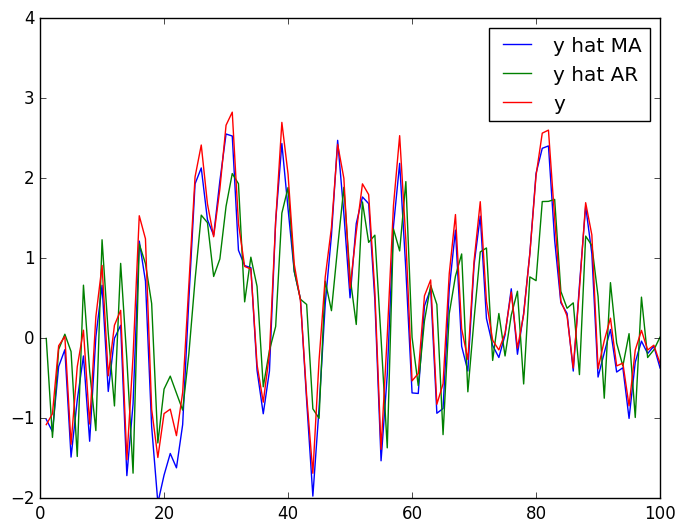

(-2,4)

In [30]:
using PyPlot
y_pred_ar = A_AR*wopt_ar
y_pred_ma = A_MA*wopt_ma
plot(1:length(y_pred_ma), y_pred_ma, label="y hat MA")
plot(1:length(y_pred_ar), y_pred_ar, label="y hat AR")
plot(1:length(y_vals), y_vals, label="y")
legend()
ylim(-2,4)

For MA $||y - \hat{y}||$ is equal to  

In [31]:
norm(y_vals - y_pred_ma)

2.460854388269911

for AR $||y - \hat{y}$ is equal to 

In [32]:
norm(y_vals - y_pred_ar)

7.436691765656793

## b.

In [51]:
A = zeros(length(y_vals), 2)
A[:,1] = u_vals[:]
A[2:end,2] = y_vals[1:end - 1]
wopt = A\y_vals

2-element Array{Any,1}:
 1.08444 
 0.485214

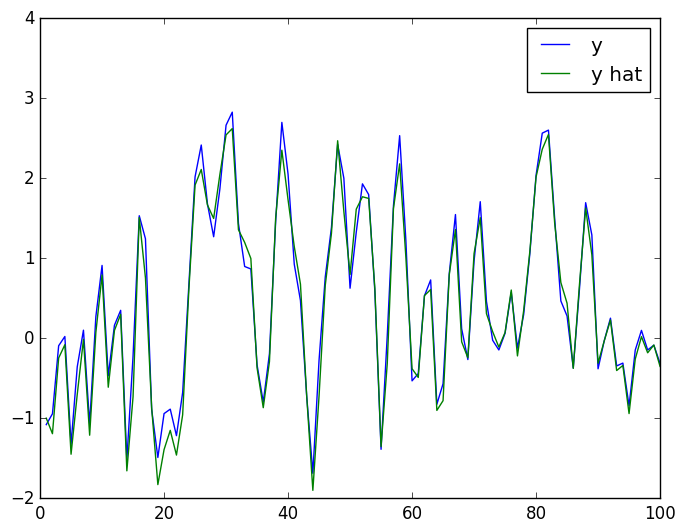

(-2,4)

In [55]:
plot(1:length(y_vals),y_vals, label="y")
plot(1:length(y_vals), A*wopt, label="y hat")
legend()
ylim(-2,4)

Here for ARMA $||y - \hat{y}||$ is equal to 

In [56]:
norm(y_vals - A*wopt)

1.8565828148734604

# Question 2

In [7]:
voltages = readcsv("voltages.csv")

200×1 Array{Float64,2}:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  1.0
  1.0
  1.0
  ⋮  
 -1.0
 -1.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

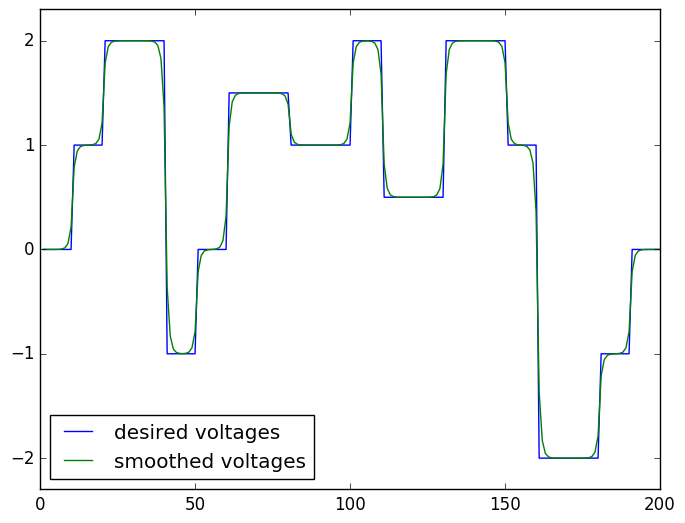

Optimize a model with 0 rows, 200 columns and 0 nonzeros
Model has 399 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 4e+00]
  QObjective range [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 200 columns, 0 nonzeros
Presolved model has 399 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 399
 AA' NZ     : 4.700e+02
 Factor NZ  : 2.449e+03
 Factor Ops : 3.695e+04 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   0.00000000e+00  0.00000000e+00  0.00e+00 4.00e+00  0.00e+00     0s
   1  -3.80762394e+02 -3.80761257e+02  1.68e-09 6.00e-06  0.00e+00     0s
   2  -3.80762393e+02 -3.80762393e+02  5.11e-15 9.00e-12  0.00e+00     0s

Barrier solved model in 2 iterations and 0.00 seconds
Optimal 

(-2.3,2.3)

In [16]:
lambda = 0.5
using JuMP, Gurobi
matrix_reg = zeros(199,200)
for i in 1:199
    matrix_reg[i,i] = 1
    matrix_reg[i,i+1] = -1
end

m = Model()

@variable(m, v[1:200])
@objective(m,Min, sum((v-voltages).^2) + lambda * sum((matrix_reg * v).^2))

solve(m)

smoothed_voltages = getvalue(v)

plot(1:200,voltages, label="desired voltages")
plot(1:200, smoothed_voltages, label="smoothed voltages")

legend(loc="lower left")
ylim(-2.3,2.3)


The plot above shows my final solution for the voltage smoothing. I set the lambda value which controls how smooth the function is to 0.5. This I believe gave the best result. As you can see the smoothed function is still fairly smooth, but it holds the correct voltage for a reasonable amount of time at each plateau. Higher lambda values resulted in the smoothed function not having the correct voltage for the vast majority of a plateau when the plateau was very narrow. With a lambda value of 0.5. the smoothed function stays at the right value of each plateau for a reasonable amount of time.

# Question 3

## a.


In [19]:
data = readcsv("xy_data.csv")

200×2 Array{Float64,2}:
 0.011511  0.33348 
 0.067153  0.092767
 0.15487   0.16742 
 0.22513   0.20237 
 0.32601   0.26017 
 0.33604   0.10723 
 0.35763   0.19671 
 0.52677   0.38872 
 0.60471   0.23223 
 0.67993   0.27944 
 0.68806   0.22448 
 0.71445   0.28196 
 0.8347    0.4512  
 ⋮                 
 9.4274    0.65643 
 9.4362    0.64774 
 9.4517    0.53317 
 9.5163    0.78124 
 9.5769    0.55474 
 9.6865    0.72587 
 9.7297    1.0     
 9.8164    0.97481 
 9.8266    0.87939 
 9.8305    0.80389 
 9.8406    0.89247 
 9.9908    0.90748 

In [34]:
polynomials = zeros(200,3)
for i in 1:200
    for p in 1:3
        polynomials[i,p] = data[i,1]^p
    end
end

In [35]:
b = polynomials\data[:,2]

3-element Array{Float64,1}:
  0.511155  
 -0.134546  
  0.00932501

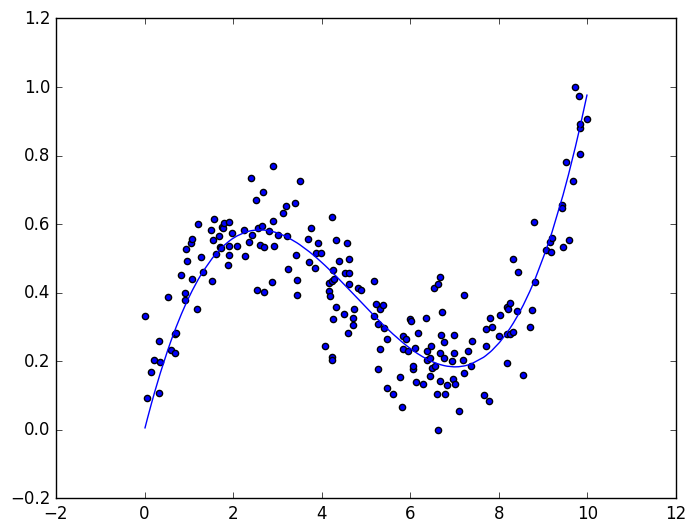

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fea36dd17b8>

In [36]:
scatter(data[:,1], data[:,2])
plot(data[:,1],polynomials * b)

Best polynomial found was
$$ y = 
0.511155x  
 - 0.134546x^2  
  + 0.00932501826181x^3
  $$

## b.

200-element Array{Float64,1}:
 0.011511
 0.067153
 0.15487 
 0.22513 
 0.32601 
 0.33604 
 0.35763 
 0.52677 
 0.60471 
 0.67993 
 0.68806 
 0.71445 
 0.8347  
 ⋮       
 9.4274  
 9.4362  
 9.4517  
 9.5163  
 9.5769  
 9.6865  
 9.7297  
 9.8164  
 9.8266  
 9.8305  
 9.8406  
 9.9908  

In [37]:
spline = zeros(200,5)
for i in 1:200
    step = 0
    start = 1
    if  data[i,1] >= 4
        step = 2
        start = 0
    end
    for p in start:2
        spline[i,p+(1-start)+step] = data[i,1]^p
    end
end

In [61]:
m = Model()
@variable(m, b[1:5])
@constraint(m, dot([4,4^2],b[1:2]) == dot([1,4,4^2],b[3:5]))
@constraint(m, b[1] + 2b[2]*4 == b[4] + 2b[5]*4)
@objective(m, Min, sum((spline*b - data[:,2]).^2))

solve(m)

Optimize a model with 2 rows, 5 columns and 9 nonzeros
Model has 9 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [9e+01, 5e+03]
  QObjective range [2e+02, 7e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 2 rows, 5 columns, 9 nonzeros
Presolved model has 9 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 8
 AA' NZ     : 8.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 5.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   0.00000000e+00  0.00000000e+00  0.00e+00 4.61e+03  0.00e+00     0s
   1  -9.78469800e-01 -6.49123619e-03  1.63e-08 4.55e+03  0.00e+00     0s
   2  -5.17237212e+00 -1.92554077e-01  1.52e-08 4.28e+03  0.00e+00     0s
   3  -5.87330754e+00 -2.50908930e-01  2.83e-08 4.23e+03  0.00e+00     0s

:Optimal

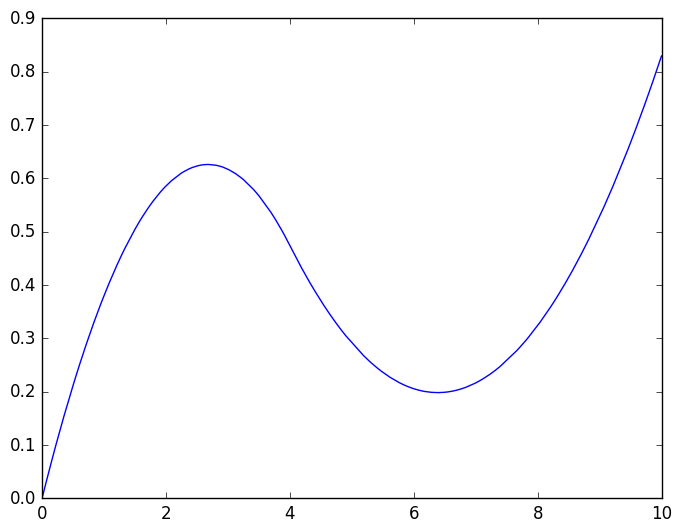

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe9fa9e16a0>

In [62]:
b_val = getvalue(b)
#scatter(data[:,1], data[:,2])
plot(data[:,1], spline*b_val)


In [63]:
(b_val[1] + 2b_val[2]*4) - (b_val[4] + 2b_val[5]*4)

-6.342704139683519e-13

In [ ]:
$$